
Name: Rahmani Dibansa

Date: 23rd of August 2022

Description:
    This python program contains my understanding of the ipnyb file for Lecture 2: housing regression.
    I will also be adding here my homework for this lesson
    
Reference(s):
    ACMSIGGRAPH. SIGGRAPH Now | Hands-on Workshop: Machine Learning and Neural Networks – Lecture 2
    Retrieved from: https://www.youtube.com/watch?v=bs2dgoeNrkQ&list=PLUPhVMQuDB_b2kcOooEduedthcBH53mvC&index=2


In [2]:
#---------- Importing Packages 
# Import packages and use tensorflow version 2.x
#%tensorflow_version 2.x
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

print(tf.__version__)

import tensorflow_addons as tfa

#----------DATA READING 
#filename = 'https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv'

# Read the data using the pandas package
# For this, I downloaded the csv file that was given
# in the Class 1- Housing.ipnyb
filename = 'california_housing_train.csv'

# Read the csv file, and add a separator
# Use pandas to read the csv file
csv_data = pd.read_csv(filename, sep=',')

print( "\n======================================================================\n" )
#----------DATA CLEANUP 
# Drop the data points that are not valid
# It removes either columns or rows that
# have missing values
clean_data = csv_data.dropna() 

# Clean/normalize the data by using this simple
# operation where it takes the range of the data
# and subtract the minimum of each data point.
# Then, we divide it by the range.
# This operation will apply to every row on the
# data set
norm_data = (clean_data-clean_data.min())/(clean_data.max()-clean_data.min()) 

# Describe the data
# After normalizing the data, the minimum and maximum should
# be within 0 and 1
print(norm_data.describe())

2.9.1


          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean       0.476882      0.327867            0.540968      0.069637   
std        0.199718      0.227135            0.246803      0.057465   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.254980      0.147715            0.333333      0.038487   
50%        0.583665      0.181722            0.549020      0.056017   
75%        0.632470      0.550478            0.705882      0.083017   
max        1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean         0.083552      0.039984      0.082260       0.233354   
std          0.065410      0.032172      0.063233       0.131595   
min          0.000000      0.000000      0.000000       0.000000   
25%         

In [ ]:
#print(clean_data.describe())

In [4]:
print( "\n======================================================================\n" )
#----------TRAIN/TEST SPLIT
# Use 80% of the data as a sample
# and use the rest of the data for testing
# Drop the data that has been used for training,
# so that what remains will be the data that was
# not selected for training
train_data = norm_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = norm_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features)
# Set the median_house_calue as the ground truth
# While the rest of the features is used for training
x_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

# separate out the y (results) from x (features)
# Conform to the rules that we have set where the median_house_value
# is the ground truth. This is done so that the test data
# will become similarly framed as the training data
x_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']


# Display the transposed statistics of the xTrain/ training data
print(' Training Data: \n', x_train.describe().transpose())

print( "\n======================================================================\n" )
# Display the transposed statistics of the yTrain/ ground truth
print(' Test Data: \n', x_test.describe().transpose())





 Training Data: 
                       count      mean       std       min       25%       50%  \
longitude           13600.0  0.476974  0.199257  0.000000  0.254980  0.583665   
latitude            13600.0  0.327413  0.226642  0.000000  0.148778  0.181722   
housing_median_age  13600.0  0.541570  0.246760  0.000000  0.333333  0.549020   
total_rooms         13600.0  0.069732  0.058075  0.000000  0.038276  0.056096   
total_bedrooms      13600.0  0.083596  0.066120  0.000155  0.045624  0.067039   
population          13600.0  0.040050  0.032843  0.000000  0.022030  0.032624   
households          13600.0  0.082255  0.063926  0.000164  0.045881  0.066930   
median_income       13600.0  0.233598  0.131226  0.000000  0.142529  0.210135   

                         75%       max  
longitude           0.631474  0.984064  
latitude            0.549416  1.000000  
housing_median_age  0.705882  1.000000  
total_rooms         0.083169  1.000000  
total_bedrooms      0.100559  1.000000  
popu

In [6]:
# The number of train keys pertains to how many
# features are there in the training
print(" The number of train keys: ", len(x_train.keys()))

 The number of train keys:  8


In [27]:
#--------MODEL BUILDING
# Model Building: This is where we feed the features that we have
# to the learning algorithm so that we can build models.


# The number of parameters is how many features there are
# at the beginning
num_params = len(x_train.keys())
print(num_params)


# Use the keras package to train a sequential neural network
# Create an input layer that has 8 features as inputs
# Create a 32-node dense layer(everything is connection to everything)
# and use the Rectified Linear Unit (relu) as the activation function
# Create another 32-node dense layer as a hidden layer
# Lastly, create the output layer that only has a single node
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    # For homework, I added another hidden layer with 21 nodes
    tf.keras.layers.Dense(21, activation='relu', name="dense_03"),
    # however, when I added this , the accuracy for prediction on test
    # data becomes very erratic and inaccurate.
    # 1 node in the output for the median_house_vale
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])


# learningRate pertains to how fast should we go down the gradients
# What kind of optimizer should be used is set as the learningRate
# For homework, I changed the learning rate from 0.001 to 0.01108
learning_rate = 0.001108

# Use the RMSprop which is a kind of algorithm used for gradient descent
# As for the loss function, use the Mean Square Error (mse)
# As for metrics, monitor the Mean Absolute Error (mae)
#
# The MAE is never negative and would be zero only if the prediction matched the ground truth perfectly. 
# It is an intuitive loss function and might also be used as one of your metrics, specifically for 
# regression problems, since you want to minimize the error in your predictions. (This is definition is taken from
# an article. Retrieved from: https://machinelearningmastery.com/loss-functions-in-tensorflow/#:~:text=The%20loss%20metric%20is%20very,with%20gradient%20descent%20and%20backpropagation.)
#
# As for MSE, it is similar to the mean absolute error as it also measures the deviation of the predicted value from the 
# ground truth value. However, the mean squared error squares this difference (always non-negative since squares of 
# real numbers are always non-negative), which gives it slightly different properties. One notable one is that the 
# mean squared error favors a large number of small errors over a small number of large errors, which leads to models 
# with fewer outliers or at least outliers that are less severe than models trained with a mean absolute error. 
# This is because a large error would have a significantly larger impact on the error and, consequently, the gradient 
# of the error when compared to a small error. (This is definition is taken from
# an article. Retrieved from: https://machinelearningmastery.com/loss-functions-in-tensorflow/#:~:text=The%20loss%20metric%20is%20very,with%20gradient%20descent%20and%20backpropagation.)
#
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              # loss function to minimize
              loss='mse',
              # list of metrics to monitor
              metrics=['mae',])



# Show the summary of the model that was trained
model.summary()

8
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_01 (Dense)            (None, 32)                288       
                                                                 
 dense_02 (Dense)            (None, 32)                1056      
                                                                 
 dense_03 (Dense)            (None, 21)                693       
                                                                 
 Output_Layer (Dense)        (None, 1)                 22        
                                                                 
Total params: 2,059
Trainable params: 2,059
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Fit/Train model on training data
# x train: These are the inputs
# y train: This is the ground truth/ result
# batch size: it is the number of parts on which the data will be partitioned.
#             This is so that the model can train in different batches.
# epochs: this is the number of times to which the entirety of the training data
#         will be use. Basically, how many times the model will train on a given training data.
# validation split: since the model will train in batches, we will need to reserve 20% of the
#                   training data of each batch for validation.
# verbose: If you want to see the progress bar during training, set this to either 1 or 2.
#          On the contrary, if you don't want to, then set it as 0
# Homework Edit: Since I am 21 years old, I decided to make both batch size and epochs
#                as 21. However, when I increased the epochs. the prediction result for
#                training loss becomes higher. I suppose this is due to overtraining
# Homework Edit 2: I set the batch size to 8 and epoch to 16, but the problem for validation
#                  loss still persist
# Homework Edit 3: When the batch size is 5 and the number of epoch is 16, the time for training
#                  became considerably longer. However, the erratic jumps on the validation loss
#                  has eased. There's only one massive jump left.
# Homework Edit 4: I changed the loss function for model compilation to mae or Mean Absolute Error.
#                  This drastically improved the training. The validation loss slowly decreased 
#                  with the number of epochs.
# Homework Edit 5: I added another hidden layer that contains 21 nodes. This resulted to an
#                  improvement. However, there is still a spike in validation loss during around 
#                  epoch 10-12
# Homework Edit 6: I increased the batch size to 16. This has resulted to better prediction result
#                  compared to the given material for HousingRegression
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=16,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/16
680/680 [==============================] - 5s 6ms/step - loss: 0.0135 - mae: 0.0807 - val_loss: 0.0140 - val_mae: 0.0793
Epoch 2/16
680/680 [==============================] - 4s 6ms/step - loss: 0.0135 - mae: 0.0806 - val_loss: 0.0135 - val_mae: 0.0806
Epoch 3/16
680/680 [==============================] - 4s 6ms/step - loss: 0.0133 - mae: 0.0798 - val_loss: 0.0143 - val_mae: 0.0875
Epoch 4/16
680/680 [==============================] - 4s 6ms/step - loss: 0.0132 - mae: 0.0795 - val_loss: 0.0131 - val_mae: 0.0798
Epoch 5/16
680/680 [==============================] - 4s 6ms/step - loss: 0.0132 - mae: 0.0796 - val_loss: 0.0134 - val_mae: 0.0785
Epoch 6/16
680/680 [==============================] - 4s 6ms/step - loss: 0.0132 - mae: 0.0795 - val_loss: 0.0138 - val_mae: 0.0853
Epoch 7/16
680/680 [==============================] - 4s 6ms/step - loss: 0.0131 - mae: 0.0794 - val_loss: 0.0137 - val_mae: 0.0852
Epoch 8/16
680/680 [==============================] - 4s 6ms/step - loss: 0.

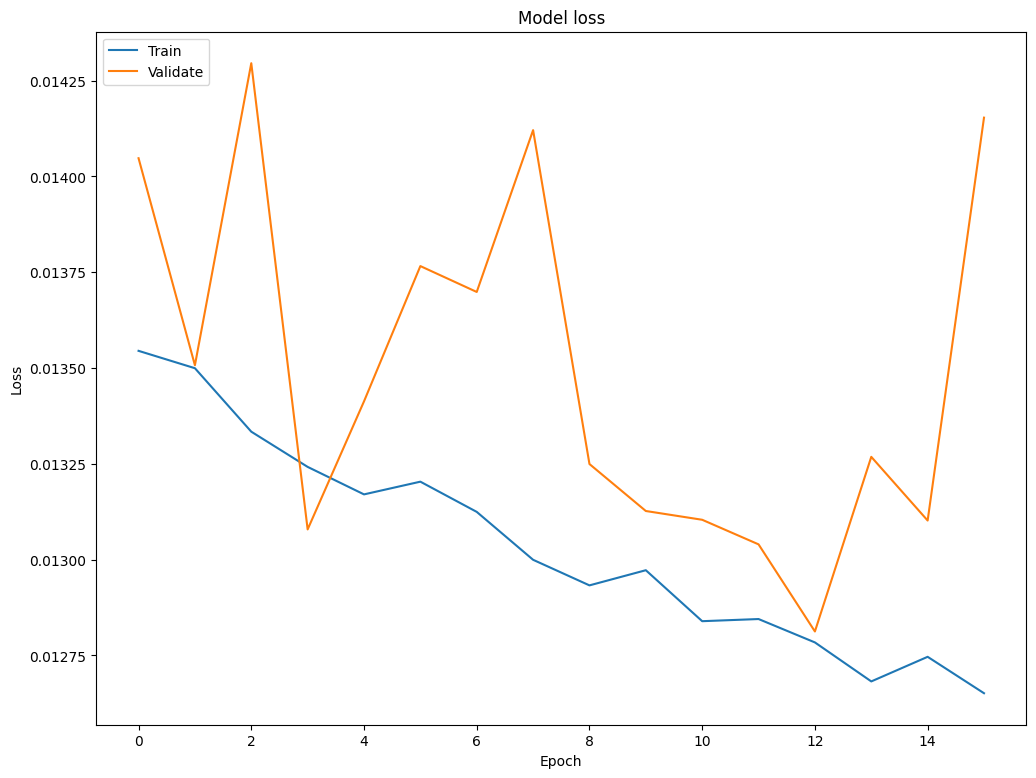

In [32]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [33]:
#--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)

107/107 - 0s - loss: 0.0150 - mae: 0.0911 - 308ms/epoch - 3ms/step
Loss: 0.014989107847213745 MAE: 0.0911388099193573


In [34]:
#--------PREDICT
# Use the model to predict
p_test = model.predict(x_test)

107/107 [==============================] - 1s 4ms/step


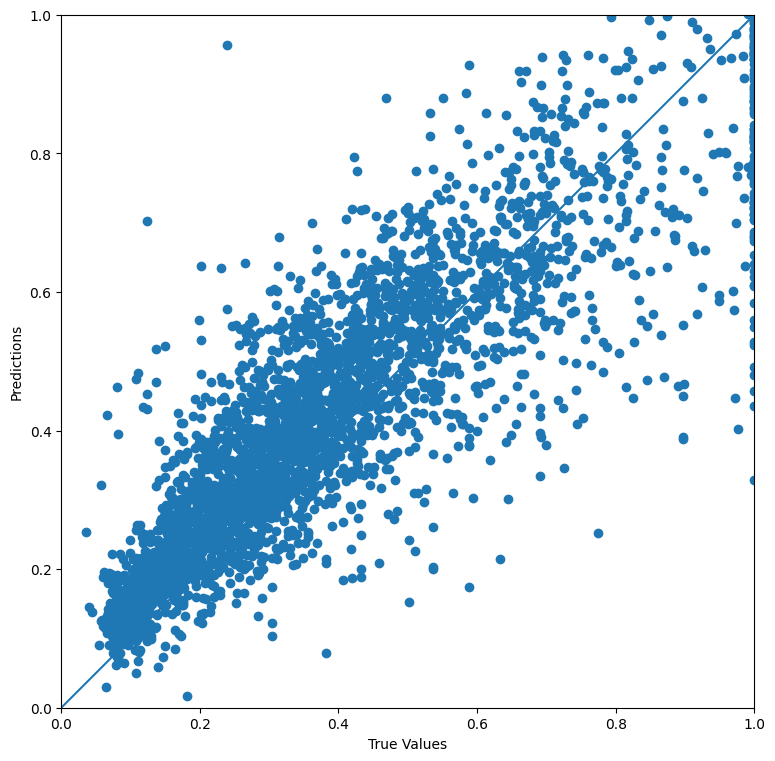

In [35]:
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

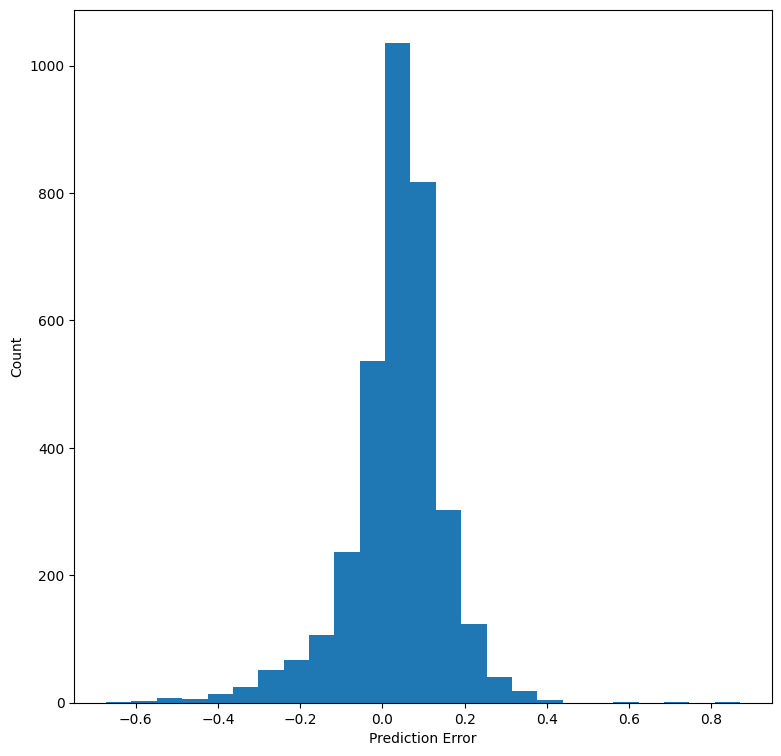

In [36]:
#---------PLOT the distribution of errors
fig = plt.figure(figsize=(9,9))
error = p_test.flatten() - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()